## Question 1

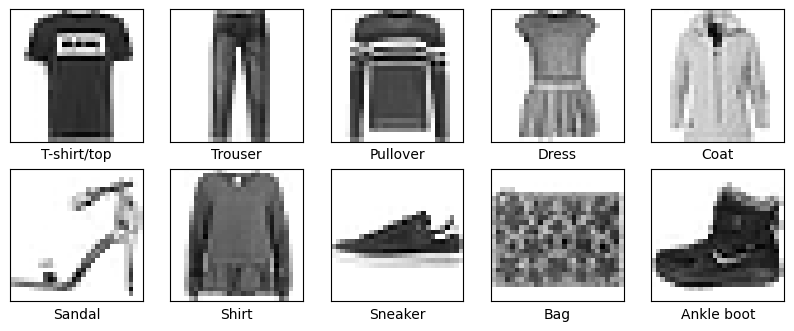

In [9]:
#importing essential libraries

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

#loading the datasets

(x_training_set, y_training_set), (x_testing_set, y_testing_set) = fashion_mnist.load_data()

#storing different classes in a list

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#function definition to plot the one image from different classes

def plot_img(images, labels, classes):
  image_list = [] #list to store one image from each class
  class_num = len(classes)

  for i in range(class_num):
    indx = np.where(labels == i)[0][0]
    image_list.append(images[indx])

  #plotting the images

  plt.figure(figsize = (10,10))
  for i in range(class_num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)
    plt.xlabel(classes[i])
  plt.show()


#calling the function

plot_img(x_training_set, y_training_set, classes)

## Question 2

In [10]:
#splitting the data for cross validation

x_validation_set = x_training_set[50000:]
y_validation_set = y_training_set[50000:]     # validation set has 10000 data

x_training_set = x_training_set[:50000]
y_training_set = y_training_set[:50000]


#vactorising the data

x_training_set = x_training_set.reshape(x_training_set.shape[0], 784)  #28x28 pixels = 784
x_testing_set = x_testing_set.reshape(x_testing_set.shape[0], 784)
x_validation_set = x_validation_set.reshape(x_validation_set.shape[0], 784)

#normalising the data

x_train = x_training_set/255  # since, pixel range from 0 to 255
x_test = x_testing_set/255
x_valid = x_validation_set/255

#one hot encoding for labels to represent categorical variables as numerical values

y_train = to_categorical(y_training_set)
y_test = to_categorical(y_testing_set)
y_valid = to_categorical(y_validation_set)


# some useful functions

#for hidden layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

#for output layer
def softmax(x):
    exponents = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exponents / np.sum(exponents, axis=1, keepdims=True)

In [14]:
#class definition

class Network:
  def __init__(self, neuron_sizes):
    self.total_layers = len(neuron_sizes)

    #initialising the weights and biases
    #After initialising storing weights and biases in separate lists
    self.Weights = [np.random.randn(neuron_sizes[i], neuron_sizes[i+1])*0.05 for i in range(self.total_layers-1)]
    self.biases = [np.random.randn(1, neuron_sizes[i+1])*0.05 for i in range(self.total_layers-1)]


  #defining function for forward propagation
  def forward_prop(self, X):
    self.pre_activations_A = [None]*(self.total_layers)  #list to store the pre-activations
    self.activations_H = [X]  #list to store the activations

    for i in range(self.total_layers-1):
      self.pre_activations_A[i+1] = np.dot(self.activations_H[i], self.Weights[i]) + self.biases[i]

      if i == self.total_layers-2:  #for output layer: activation function = softmax
        h = softmax(self.pre_activations_A[i+1])
        self.activations_H.append(h)

      else:  #for hidden layers: activation function = sigmoid
        h = sigmoid(self.pre_activations_A[i+1])
        self.activations_H.append(h)
    return self.activations_H[-1]



In [15]:
#choosing the parameters

#these all are hyper-parameters we can tune then to avoid overfitting
neuron_sizes = [784, 64, 64, 10]   #input size, hidden layers, output size
learning_rate_eta = 0.01
total_epochs = 20
batch_size = 128

#initialization of the neural network by making an object of class network
my_model = Network(neuron_sizes)

In [18]:
#training the model by passing dataset

for epoch in range(total_epochs):

    #passing data by splitting them in mini batches
    for i in range(0, x_train.shape[0], batch_size):
        # Forward pass
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        y_pred = my_model.forward_prop(batch_x)

    #computing accuracy on the validation set
    y_valid_pred = my_model.forward_prop(x_valid)
    accuracy = np.mean(np.argmax(y_valid_pred, axis=1) == np.argmax(y_valid, axis=1))
    print(f"Epoch Number {epoch+1}, Validation Accuracy: {accuracy:.4f}")


#checking the efficiency og the model by passing tets set
y_test_pred = my_model.forward_prop(x_test)
test_accuracy = np.mean(np.argmax(y_test_pred, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch Number 1, Validation Accuracy: 0.1050
Epoch Number 2, Validation Accuracy: 0.1050
Epoch Number 3, Validation Accuracy: 0.1050
Epoch Number 4, Validation Accuracy: 0.1050
Epoch Number 5, Validation Accuracy: 0.1050
Epoch Number 6, Validation Accuracy: 0.1050
Epoch Number 7, Validation Accuracy: 0.1050
Epoch Number 8, Validation Accuracy: 0.1050
Epoch Number 9, Validation Accuracy: 0.1050
Epoch Number 10, Validation Accuracy: 0.1050
Epoch Number 11, Validation Accuracy: 0.1050
Epoch Number 12, Validation Accuracy: 0.1050
Epoch Number 13, Validation Accuracy: 0.1050
Epoch Number 14, Validation Accuracy: 0.1050
Epoch Number 15, Validation Accuracy: 0.1050
Epoch Number 16, Validation Accuracy: 0.1050
Epoch Number 17, Validation Accuracy: 0.1050
Epoch Number 18, Validation Accuracy: 0.1050
Epoch Number 19, Validation Accuracy: 0.1050
Epoch Number 20, Validation Accuracy: 0.1050
Test Accuracy: 0.1000


## Question 3